<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/07-Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Perceptrón
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

####Nicolás Nolivos

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos un perceptrón para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [1]:
# Paquetes necesarios
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

---
## <font color='264CC7'> Clasificación </font>

Se usará el conjunto de datos de dígitos de MNIST.

In [2]:
# Cargamos el dataset MNIST
X, y = fetch_openml('mnist_784', return_X_y=True, parser='auto')


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

#### <font color='264CC7'> Mostrar los primeros 5 dígitos </font>

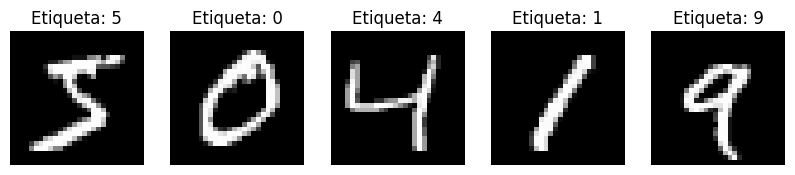

In [3]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Etiqueta: {y[i]}")
    ax.axis('off')
plt.show()

#### <font color='264CC7'> Descripción de los datos </font>

In [4]:
# Descripción básica del dataset
print(f"Dimensión de X: {X.shape}")
print(f"Tipos de etiquetas: {np.unique(y)}")  # De 0 a 9

Dimensión de X: (70000, 784)
Tipos de etiquetas: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


Se tienen 70000 muestras (Imágenes) y 784 características (28x28 píxeles aplanados)

#### <font color='264CC7'> Escalar Datos </font>

In [5]:
# Conversión de etiquetas a enteros
y = y.astype(np.uint8)

# Escalar los datos
# Convertir de DataFrame a numpy array antes de escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### <font color='264CC7'> Determinación de la red </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina una red neuronal para clasificar los datos:
<ul>
  <li>Define la red.</li>
  <li>Compila la red.</li>
  <li>Presenta un resumen de la red.</li>
</ul>
</div>


In [6]:
# 1. Definir la red neuronal
# Usamos una red simple: 1 capa oculta con 64 neuronas + capa de salida con 10 neuronas (una por cada dígito)
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),  # Capa oculta con ReLU
    Dense(10, activation='softmax')                    # Capa de salida (clasificación multiclase)
])

# 2. Compilar la red
model.compile(
    optimizer='adam',                   # Optimizador eficiente
    loss='sparse_categorical_crossentropy',  # Pérdida adecuada para clasificación con etiquetas enteras
    metrics=['accuracy']                # Métrica principal: precisión
)

# 3. Mostrar resumen de la red
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

El modelo cuenta con un total de 50,890 parámetros entrenables. Estos parámetros son los que la red ajustará durante el proceso de entrenamiento para minimizar la diferencia entre sus predicciones y las etiquetas reales de los dígitos en el conjunto de datos MNIST.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

#### <font color='264CC7'> Entrenamiento </font>


In [7]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# 2. Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

Epoch 1/10
1575/1575 - 6s - 4ms/step - accuracy: 0.9219 - loss: 0.2727 - val_accuracy: 0.9573 - val_loss: 0.1754
Epoch 2/10
1575/1575 - 4s - 3ms/step - accuracy: 0.9655 - loss: 0.1163 - val_accuracy: 0.9598 - val_loss: 0.1854
Epoch 3/10
1575/1575 - 5s - 3ms/step - accuracy: 0.9749 - loss: 0.0840 - val_accuracy: 0.9664 - val_loss: 0.1788
Epoch 4/10
1575/1575 - 4s - 3ms/step - accuracy: 0.9805 - loss: 0.0633 - val_accuracy: 0.9663 - val_loss: 0.2363
Epoch 5/10
1575/1575 - 4s - 3ms/step - accuracy: 0.9846 - loss: 0.0515 - val_accuracy: 0.9666 - val_loss: 0.2489
Epoch 6/10
1575/1575 - 6s - 4ms/step - accuracy: 0.9882 - loss: 0.0386 - val_accuracy: 0.9696 - val_loss: 0.2559
Epoch 7/10
1575/1575 - 4s - 3ms/step - accuracy: 0.9902 - loss: 0.0307 - val_accuracy: 0.9689 - val_loss: 0.2888
Epoch 8/10
1575/1575 - 5s - 3ms/step - accuracy: 0.9915 - loss: 0.0259 - val_accuracy: 0.9696 - val_loss: 0.3307
Epoch 9/10
1575/1575 - 4s - 3ms/step - accuracy: 0.9929 - loss: 0.0215 - val_accuracy: 0.9671 - 

#### <font color='264CC7'> Evaluar el Modelo </font>


In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en test: {test_accuracy:.4f}")

Precisión en test: 0.9671


#### <font color='264CC7'> Matriz de confusión y Métricas dle Modelo </font>


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


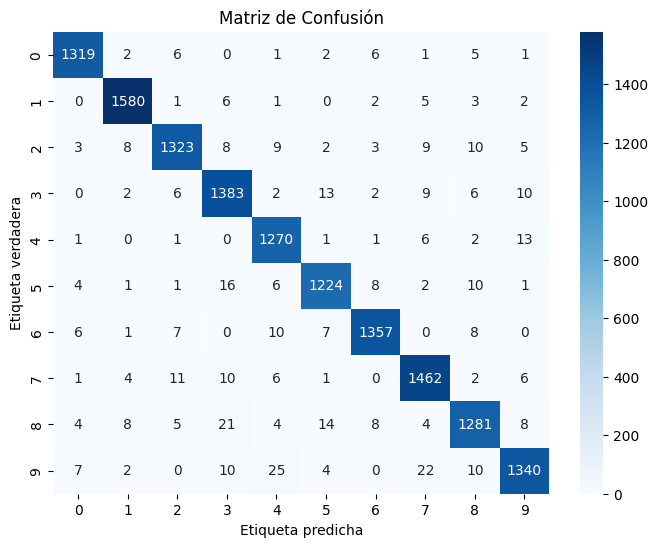

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.96      0.97      1380
           3       0.95      0.97      0.96      1433
           4       0.95      0.98      0.97      1295
           5       0.97      0.96      0.96      1273
           6       0.98      0.97      0.98      1396
           7       0.96      0.97      0.97      1503
           8       0.96      0.94      0.95      1357
           9       0.97      0.94      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [9]:
# Predicciones
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Matriz de confusión y métricas
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))


### Regularizador

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

# 1. Definir la red neuronal con regularización
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,),
          kernel_regularizer=regularizers.l2(0.001)),  # Regularización L2
    Dropout(0.3),                                       # Dropout del 30%
    Dense(10, activation='softmax')                     # Capa de salida
])

# 2. Compilar la red
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Mostrar resumen de la red
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# 3. Evaluar el modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en test: {test_accuracy:.4f}")

# 4. Predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# 5. Reporte de clasificación
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred_classes))

# 6. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión con Regularización")
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta verdadera")
plt.show()


### <font color='264CC7'> Conclusión </font>


El modelo de perceptrón multicapa entrenado para clasificar los dígitos manuscritos del conjunto MNIST logró un excelente desempeño, alcanzando una precisión del 97% en el conjunto de prueba. Las métricas de evaluación como precisión, recall y F1-score fueron consistentemente altas en todas las clases, destacando su capacidad para generalizar. La matriz de confusión muestra una baja tasa de error, lo cual confirma la efectividad del modelo en la tarea de clasificación. Este ejercicio demuestra cómo una red neuronal simple puede ser eficaz para resolver problemas clásicos de reconocimiento de patrones.